## Importing the Dependencies

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print("No of Elements in X train : ",len(X_train))
print("No of Elements in Y train : ",len(y_train))
print("No of Elements in X test : ",len(X_test))
print("No of Elements in Y test : ",len(y_test))

No of Elements in X train :  60000
No of Elements in Y train :  60000
No of Elements in X test :  10000
No of Elements in Y test :  10000


In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0] #represents a 2D array for the first element of the dataset

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Taking a sneak peek at our dataset images

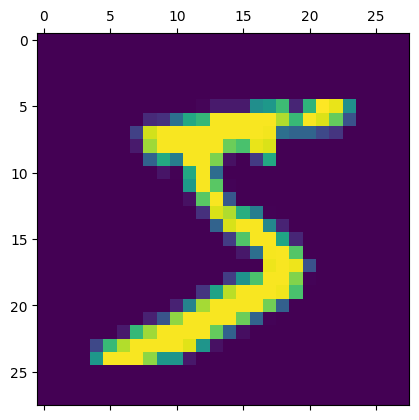

The Value as shown in the image :  5


In [6]:
plt.matshow(X_train[0]);
plt.show()
print('The Value as shown in the image : ',y_train[0])

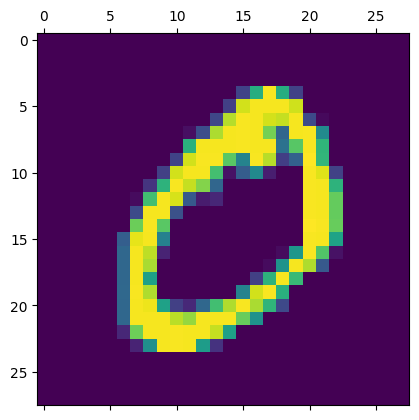

The Value as shown in the image :  0


In [7]:
plt.matshow(X_train[1]);
plt.show()
print('The Value as shown in the image : ',y_train[1])

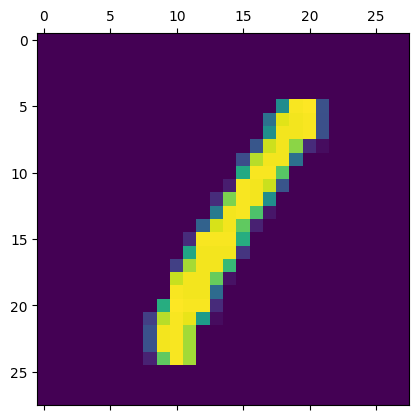

The Value as shown in the image :  1


In [8]:
plt.matshow(X_train[3]);
plt.show()
print('The Value as shown in the image : ',y_train[3])

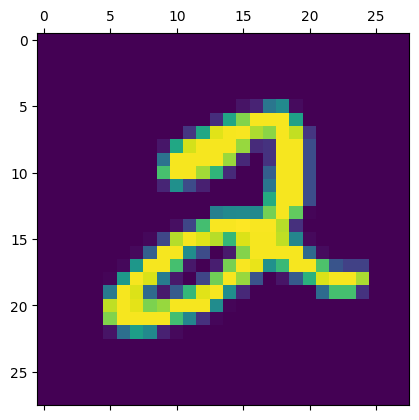

The Value as shown in the image :  2


In [9]:
plt.matshow(X_train[5]);
plt.show()
print('The Value as shown in the image : ',y_train[5])

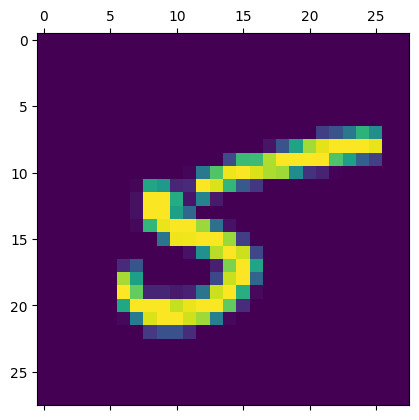

The Value as shown in the image :  5


In [10]:
plt.matshow(X_train[145]);
plt.show()
print('The Value as shown in the image : ',y_train[145])

In [11]:
#To basically get an idea of the values we have as our dataset
print(y_train[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


These numbers represent the values of the images in a consecutive manner

In [12]:
X_train.shape

(60000, 28, 28)

1.    `60000` is the total number of data
2. `28,28` mentions the dimensions of our images (individual dim.)




In [13]:
# converting the 2D array into a 1D array by Flattening method
X_trainFlattened=X_train.reshape(len(X_train),28*28)
print("Flattened Shape of our X train Data : ", X_trainFlattened.shape)

X_testFlattened=X_test.reshape(len(X_test),28*28)
print("Flattened Shape of our X test Data : ", X_testFlattened.shape)

Flattened Shape of our X train Data :  (60000, 784)
Flattened Shape of our X test Data :  (10000, 784)


**So now lets see the difference after flattening**

In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
X_trainFlattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

**Flattening is the process of converting a multidimensional array or tensor into a one-dimensional array or vector, which can be passed as input to a fully connected neural network layer.**

In [16]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_trainFlattened,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 8s 2ms/step - loss: 9.3379 - accuracy: 0.8427
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 6.0056 - accuracy: 0.8789
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7458 - accuracy: 0.8835
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4079 - accuracy: 0.8860
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 5.4286 - accuracy: 0.8851
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2283 - accuracy: 0.8903
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 5.3307 - accuracy: 0.8877
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 5.2039 - accuracy: 0.8901
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1742 - accuracy: 0.8911
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 5.256

We see that we have a pretty good accuracy score for our model, a whopping 89%. Now let's say if our model doesnt appear as succesful as this set, so we need to scale our data by doing this :

```
X_train=X_train/255
X_test=X_test/255
```
To reduce the value of 255 pix to something between 0 and 1

In [17]:
#Lets Try Scaling to See what happens and how our accuracy improves
X_trainA=X_train/255
X_testA=X_test/255
# converting the 2D array into a 1D array by Flattening method
X_trainAFlattened=X_trainA.reshape(len(X_trainA),28*28)
print("Flattened Shape of our X train Data : ", X_trainAFlattened.shape)
X_testAFlattened=X_testA.reshape(len(X_testA),28*28)
print("Flattened Shape of our X test Data : ", X_testAFlattened.shape)
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_trainAFlattened,y_train,epochs=50)

Flattened Shape of our X train Data :  (60000, 784)
Flattened Shape of our X test Data :  (10000, 784)
Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4687 - accuracy: 0.8776
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3047 - accuracy: 0.9151
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.9233
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9259
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9263
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2582 - accuracy: 0.9283
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9291
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.252

We can see how the accuracy score has leaped from 89% to 93% which is way better for our model.

In [18]:
model.evaluate(X_testAFlattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2812 - accuracy: 0.9286


[0.28117311000823975, 0.928600013256073]

## Trying our model on our Dataset

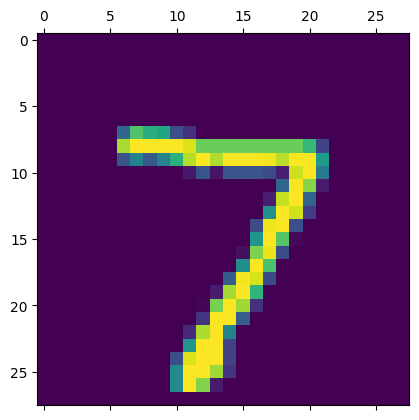

In [21]:
plt.matshow(X_testA[0])

In [25]:
y_predicted=model.predict(X_testAFlattened)
print("Predicted Value : ",y_predicted[0])

313/313 [==============================] - 0s 1ms/step
Predicted Value :  [9.3120764e-07 2.0020459e-12 1.8039807e-05 9.7122115e-01 2.6677505e-04
 8.2148269e-02 3.0941574e-13 9.9990916e-01 7.5883232e-02 6.7511570e-01]


In [26]:
np.argmax(y_predicted[0]) #to find the maximum value a network will have after running the neural network

7

Predicted Value :  2


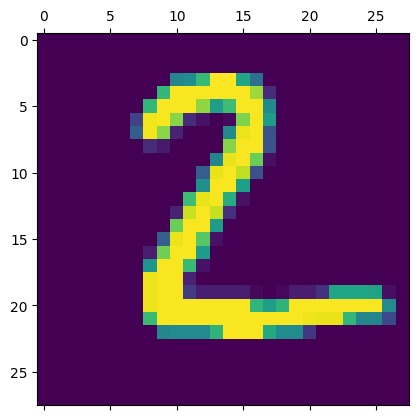

In [29]:
plt.matshow(X_testA[1]);
print("Predicted Value : ",np.argmax(y_predicted[1]))

Predicted Value :  1


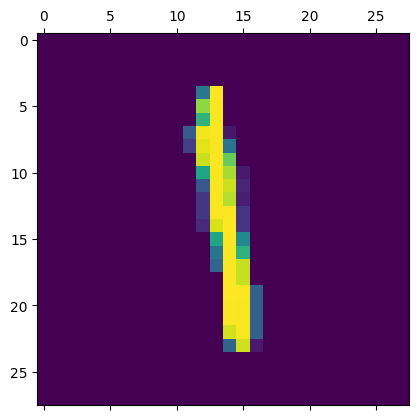

In [30]:
plt.matshow(X_testA[145]);
print("Predicted Value : ",np.argmax(y_predicted[145]))

Predicted Value :  5


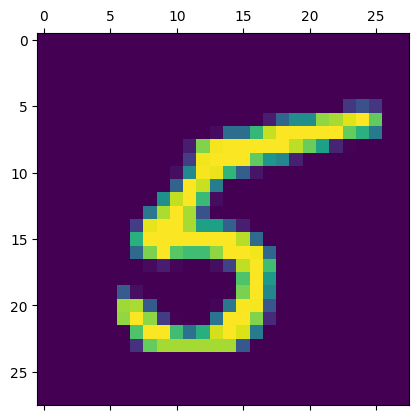

In [31]:
plt.matshow(X_testA[6500]);
print("Predicted Value : ",np.argmax(y_predicted[6500]))

**Creating a Confusion Matrix**

In [33]:
y_predictedLabels=[np.argmax(i) for i in y_predicted]
y_predictedLabels[:5]

[7, 2, 1, 0, 4]

In [34]:
confMatrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predictedLabels)
confMatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 946,    0,    2,    2,    2,   10,   10,    5,    3,    0],
       [   0, 1115,    5,    1,    0,    1,    3,    1,    9,    0],
       [   5,    6,  936,   10,   10,    3,   10,   10,   39,    3],
       [   2,    1,   23,  912,    1,   24,    1,   10,   29,    7],
       [   1,    2,    8,    2,  922,    0,    6,    5,    8,   28],
       [   6,    4,    2,   34,    8,  777,   13,    9,   36,    3],
       [   9,    3,    8,    1,    8,   16,  910,    1,    2,    0],
       [   1,    6,   25,    3,    4,    1,    0,  953,    2,   33],
       [   5,    8,    7,   15,    8,   19,    6,   10,  887,    9],
       [   6,    7,    0,    9,   24,    7,    0,   17,   11,  928]],
      dtype=int32)>

Text(70.72222222222221, 0.5, 'Truth')

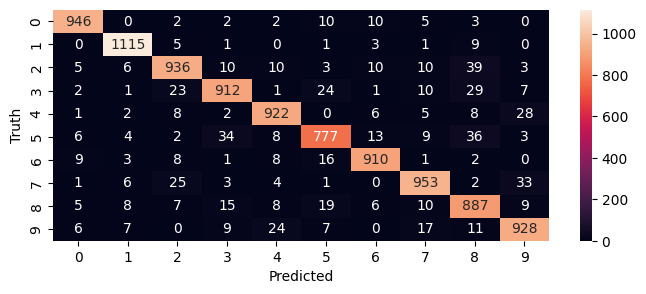

In [35]:
#to visualize our confusion matrix we use Seaborn
import seaborn as sns
plt.figure(figsize=(8,3))
sns.heatmap(confMatrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

Let's describe the above matrix ⁉
So here's the thing, `Truth` is the actual value, whereas `Predicted` is the value that our model has predicted.

So as we see, let's say for truth value **2** our model has predicted its 2, **936** times where as for 39 times our model thought it's 2, which is obviously not the correct prediction.

Same goes for the other columns as well.

### `Now trying to add a Hidden Layer to our model`
*maybe to increase the accuracy score

In [37]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),
                                           activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_trainAFlattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2709 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1224 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0851 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0510 - accuracy: 0.9840


So, with addition of a hidden layer we see, our accuracy score at a soaring high 98% :)

In [38]:
model.evaluate(X_testAFlattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9737


[0.08619897067546844, 0.9736999869346619]

313/313 [==============================] - 2s 5ms/step


Text(70.72222222222221, 0.5, 'Truth')

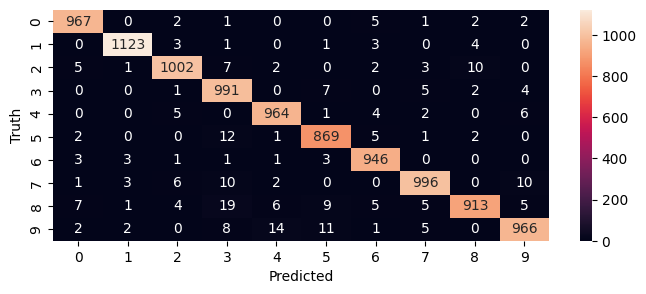

In [41]:
y_predicted=model.predict(X_testAFlattened)
y_predictedLabels=[np.argmax(i) for i in y_predicted]
y_predictedLabels[:5]
confMatrixA=tf.math.confusion_matrix(labels=y_test,predictions=y_predictedLabels)
plt.figure(figsize=(8,3))
sns.heatmap(confMatrixA,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

Now let's compare the above and the previous heatmaps we have received. There has been a distinguishable and noticable change(decrease) in the error in terms of predictions. So adding a hidden layer supports our model far better than just one layer of neuron

### Using a `Flatten()` function from KERAS

In [45]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4221 - accuracy: 0.8422
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4120 - accuracy: 0.9014
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3034 - accuracy: 0.9221
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2561 - accuracy: 0.9331
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2340 - accuracy: 0.9385
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2204 - accuracy: 0.9437
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2073 - accuracy: 0.9466
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2063 - accuracy: 0.9471
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1934 - accuracy: 0.9497
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.188

Not getting the accuracy as high as Just the denseLayer and Hidden Layer but its still high.